In [1]:
import torch
from torch.nn.functional import softmax
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.random.manual_seed(1234)
np.random.seed(1234)

Let $T=5$ and $D=3$

In [3]:
T = 5
D = 3

Initialize $Q_{proj}$, $K_{proj}$ and $V_{proj}$, the projection tensors using random numbers

In [4]:
Q_proj = torch.randn((D, D))
K_proj = torch.randn((D, D))
V_proj = torch.randn((D, D))

In [5]:
def get_features(x: torch.tensor):
    """
    A function which computes the attention weights A and multiplies by feature tensor V

    :param x: the input tensor
    :return:
    """
    Q = x @ Q_proj
    K = x @ K_proj
    V = x @ V_proj

    A = Q @ K.T * (1.0 / math.sqrt(D))
    A = softmax(A, dim=1)
    y = A @ V
    return y

## Without positional encoding

First create a $T \times D$ input tensor and get the attention output

In [6]:
x = torch.randn((T, D))
y = get_features(x=x)

Now shuffle the input tensor and get the attention output.

We can see that the output is shuffled the same as the input

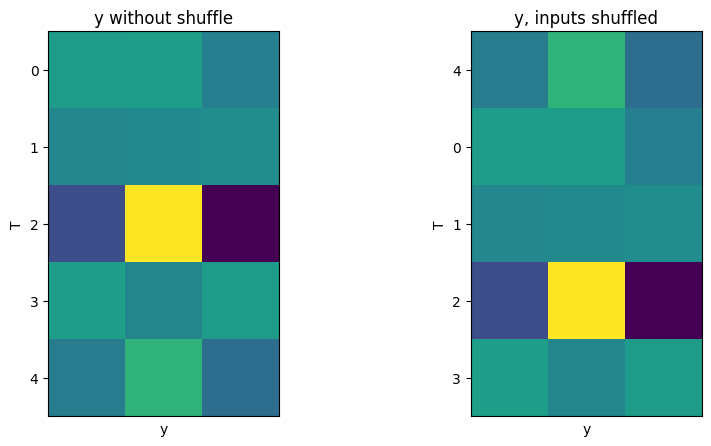

In [7]:
shuffled_order = np.random.choice(range(T), size=T, replace=False)
x_perm = x[shuffled_order]
y_perm = get_features(x=x_perm)

_, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(y, vmin=y.min(), vmax=y.max())
ax[0].set_yticks(range(T))
ax[0].set_xticks([])
ax[0].set_title('y without shuffle')
ax[0].set_xlabel('y')
ax[0].set_ylabel('T')


ax[1].imshow(y_perm, vmin=y.min(), vmax=y.max())
ax[1].set_yticks(range(T), labels=shuffled_order)
ax[1].set_xticks([])
ax[1].set_title('y, inputs shuffled')
ax[1].set_xlabel('y')
ax[1].set_ylabel('T')
plt.show()

## With positional encoding

Now let's create a positional embedding tensor and add that to the input tensor.

Now if we shuffle the input, we get 2 totally different outputs based on the order of the input.

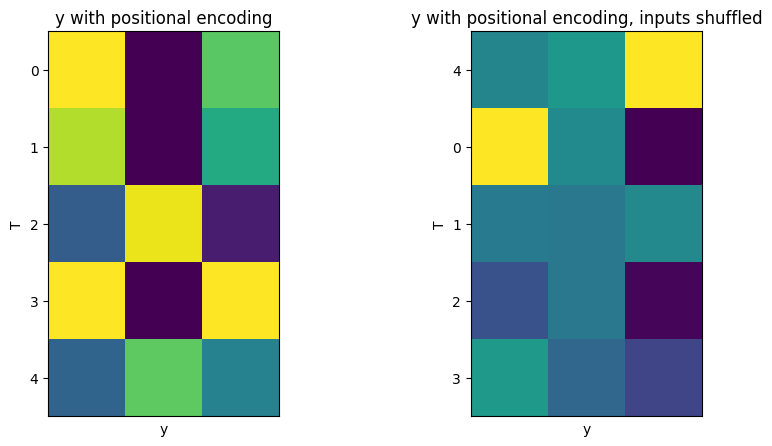

In [8]:
positional_embedding = torch.randn((T, D))
y_with_pos = get_features(x=x + positional_embedding)
y_shuffle_with_pos = get_features(x=x[shuffled_order] + positional_embedding)

_, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(y_with_pos, vmin=y.min(), vmax=y.max())
ax[0].set_yticks(range(T))
ax[0].set_xticks([])
ax[0].set_title('y with positional encoding')
ax[0].set_xlabel('y')
ax[0].set_ylabel('T')

ax[1].imshow(y_shuffle_with_pos, vmin=y.min(), vmax=y.max())
ax[1].set_yticks(range(T), labels=shuffled_order)
ax[1].set_xticks([])
ax[1].set_title('y with positional encoding, inputs shuffled')
ax[1].set_xlabel('y')
ax[1].set_ylabel('T')
plt.show()